# Simple Testing & Experimenting Rubbish Notebook

In [1]:
# Import AAAALL THE GOODIES
from data import mask_dataset
from model import UNet
from torch.utils.data import DataLoader
data_path = "C:\\Users\\nikos\\Desktop\\denoising\\train\\"
import numpy as np
import torch
import os
from utils import *
import time
from tqdm import tqdm
from itertools import chain
from glob import glob
import matplotlib.pyplot as plt
filenames = glob(os.path.join(data_path, '*.npy'))

In [2]:
ds = mask_dataset(data_path=data_path, f_min = 1, f_max = 10, N_sub=32)

In [20]:
loader = DataLoader(ds, batch_size=512,shuffle = True,drop_last=True)

In [21]:
for i, (x,y) in tqdm(enumerate(loader)):
    pass

8it [00:05,  1.43it/s]


KeyboardInterrupt: 

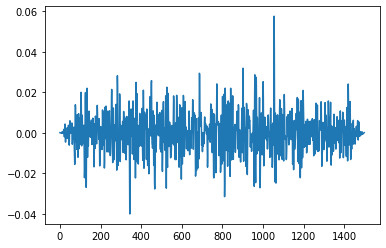

In [16]:
z = np.ma.array(x,mask = np.logical_not(y))
plt.plot(z[0,17])

## hand picked Validation

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from model import UNet
from utils import *
import torch.nn as nn

In [3]:
batch_size = 64
model = UNet(input_bands=batch_size,hidden_channels=12, output_classes=batch_size)

In [4]:
state = torch.load('model.pth')
model.load_state_dict(state['model_state_dict'])

<All keys matched successfully>

In [5]:
model.eval()

UNet(
  (inc): Sequential(
    (0): Conv2d(64, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU(inplace=True)
      (4): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
    )
  )
  (down2): Down(
    (maxpool_conv): Sequent

In [6]:
x = np.load(f"C:\\Users\\nikos\\Desktop\\DAS-data\\val\\S_UTC_20211019_053130.851.h5.npy")
x = x/x.std()
x = taper_filter(x,1,10,1000)

In [7]:
target = x[1736:1736+32*64]
target = torch.tensor(target.astype(np.float32).copy())
target = target.reshape(64,32,30000)
target.shape

torch.Size([64, 32, 30000])

In [8]:
out = model(target[None,...]).squeeze()
out.shape

torch.Size([64, 32, 30000])

In [9]:
out__ = taper_filter(out.detach().numpy(),1,10,1000)

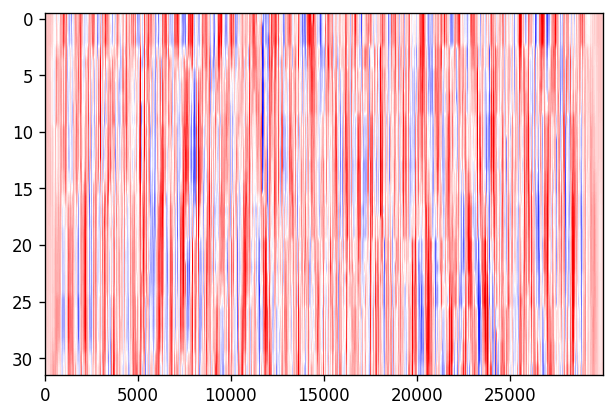

In [10]:
plt.figure(dpi=120)
plt.imshow(target[16],aspect = 'auto',cmap = 'seismic')

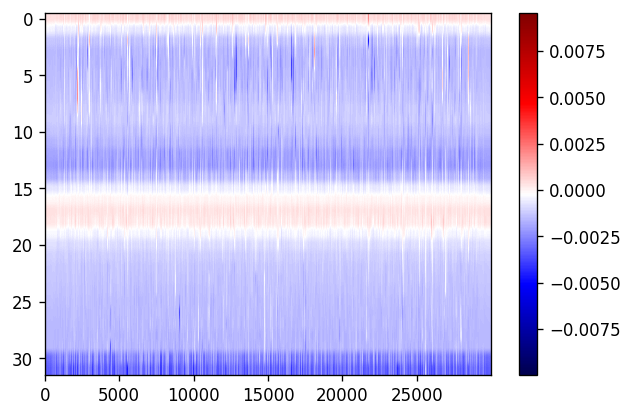

In [20]:
plt.figure(dpi=120)
plt.imshow(out[16].detach().numpy(),aspect = 'auto',cmap = 'seismic')
plt.colorbar()

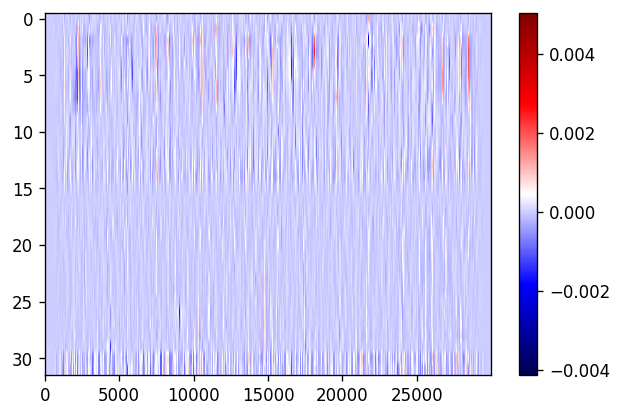

In [12]:
plt.figure(dpi=120)
plt.imshow(out__[16],aspect = 'auto',cmap='seismic')
plt.colorbar()

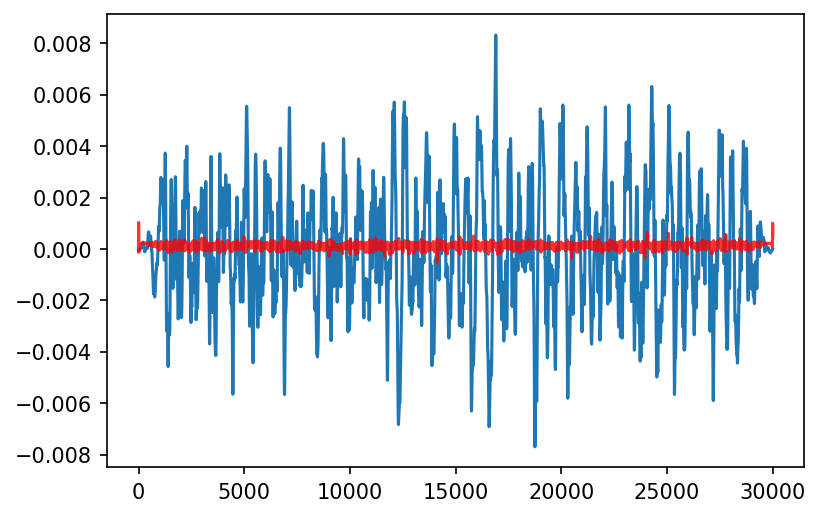

In [17]:
fig, ax1 = plt.subplots(1,dpi=150)
ax1.plot(target[0,16])
ax1.plot(out[0,16].detach().numpy(),'r',alpha=0.8)

In [14]:
criterion = nn.MSELoss()

In [15]:
criterion(out,target).item()

9.661827789386734e-06

In [5]:
X = []
for i in range(0,4):
    x = np.load(filenames[i])[1700:2364]
    X.append(x)

X = np.stack(X)
X.shape

(4, 664, 30000)

In [ ]:
class ds(torch.utils.data.DataSet):
    def __init__(self, X, N_sub, batch_size, batch_multiplier):
        self.X = X
        self.batch_size = batch_size
        self.batch_multiplier = batch_multiplier
        # number of samples.
        self.N_samples = X.shape[0]
        # number of channels.
        self.N_ch = X.shape[1]
        # number of time sampling points.
        self.N_t = X.shape[2]
        # number of channels per batch sample.
        self.N_sub = N_sub

    def __getitem__(self):
        pass
    def __len__(self):
        return int(self.batch_multiplier * self.N_samples * self.N_ch / float(self.batch_size * self.N_sub))
    